In [32]:
from pathlib import Path
from typing import List
import tensorflow as tf
import random

class Config:

    def __init__(self):
        self.learning_rate              = 1e-3
        self.convergence_error          = 1e-4
        self.max_epoch                  = 100000
        self.restore_dir                = ""
        self.save_dir                   = Path.home().joinpath('checkpoints', 'stock_predictor_weight')
    
class Neuron:

    random.seed(42)
    
    def __init__(self):
        self.config = Config()
        self.weights = None
        self.bias = None
    
    def train(self, samples: List, targets: List):
        samples_tensor = tf.constant(samples, dtype=tf.float32)
        targets_tensor = tf.constant(targets, dtype=tf.float32)
        self.weights = tf.Variable([random.random() for _ in range(samples_tensor.shape[1])], dtype=tf.float32)
        self.bias = tf.Variable(random.random(), dtype=tf.float32)  # Initialize the bias term

        epoch = 0
        while True:
            with tf.GradientTape() as tape:
                predictions = tf.reduce_sum(samples_tensor * self.weights, axis=1) + self.bias
                loss = tf.reduce_mean(0.5 * tf.square((targets_tensor - predictions)))
                error_value = loss.numpy()
            
            gradients = tape.gradient(loss, [self.weights, self.bias])
            self.weights.assign_sub(self.config.learning_rate * gradients[0])
            self.bias.assign_sub(self.config.learning_rate * gradients[1])  # Update the bias
            if error_value <= self.config.convergence_error or epoch == self.config.max_epoch:
                # self.save_model()
                print(f"epochs:{epoch}, Loss:{error_value}")
                return error_value
                    
            epoch += 1
        
    
    def save_model(self):
        # Save weights and bias
        tf.saved_model.save({'weights': self.weights, 'bias': self.bias}, self.config.save_dir)

    def restore_weights(self):
        # Restore weights and bias
        model = tf.saved_model.load(self.config.restore_dir)
        self.weights = model['weights']
        self.bias = model['bias']

    def predict(self, samples: List) -> List:
        samples_tensor = tf.constant(samples, dtype=tf.float32)
        predictions = tf.reduce_sum(samples_tensor * self.weights, axis=1) + self.bias
        return predictions.numpy().tolist()


In [25]:
import requests
from bs4 import BeautifulSoup
from typing import List, Dict, Optional

class WebCrawlerBase:
    """Base class for web crawlers."""

    @property
    def headers(self) -> Dict[str, str]:
        """Return default headers for requests."""
        return {
            "User-Agent": (
                "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 "
                "(KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.3"
            ),
            "Accept": "text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,*/*;q=0.8",
        }


class WebCrawlerStockVolumes(WebCrawlerBase):
    """Crawler to fetch stock volumes based on stock ID."""

    def __init__(self, stock_id: str) -> None:
        self.stock_id = stock_id

    @property
    def url(self) -> str:
        """Return the URL to fetch stock volumes."""
        return "https://stock.wespai.com/p/21965"

    def get_volumes(self) -> Optional[str]:
        """Fetch and return the stock volume for the specified stock ID."""
        try:
            response = requests.get(self.url, headers=self.headers)
            response.raise_for_status()
        except requests.RequestException as e:
            print(f"Error fetching stock volumes: {e}")
            return None

        soup = BeautifulSoup(response.text, "html5lib")
        tags = soup.find_all('td')

        for tag in tags:
            if self.stock_id in tag.text and len(tag.text) == 4:
                next_tags = tag.find_next_siblings('td', limit=3)
                if next_tags:
                    return next_tags[-1].text
        return None


class WebCrawlerStockPercentage(WebCrawlerBase):
    """Crawler to fetch stock percentage changes."""

    @property
    def url(self) -> str:
        """Return the URL to fetch stock percentage changes."""
        return "https://www.taifex.com.tw/cht/9/futuresQADetail"

    def get_stock_percentage(self) -> Optional[List[Dict[str, float]]]:
        """Fetch and return a list of stock percentage changes."""
        try:
            response = requests.get(self.url, headers=self.headers)
            response.encoding = 'utf-8'
            response.raise_for_status()
        except requests.RequestException as e:
            print(f"Error fetching stock percentages: {e}")
            return None

        soup = BeautifulSoup(response.text, 'html.parser')
        table = soup.find('table')

        if table is None:
            print("No table found in the response.")
            return None

        stock_info = []

        for row in table.find_all('tr')[1:]:
            cols = row.find_all('td')
            if len(cols) > 3:
                code = cols[1].text.strip()
                name = cols[2].text.strip()
                percent = cols[3].text.strip()
                try:
                    percent_float = round(float(percent.replace('%', '').replace(',', '')) / 100, 6)
                except ValueError:
                    percent_float = 0.0
                stock_info.append({'code': code, 'name': name, 'percent': percent_float})

        return stock_info


epochs:34859, Loss:9.999705071095377e-05
初始資本: 1000000
最終資本: 1079754.601226994
收益率: 7.98%

每日交易操作和持倉表現:
{'Date': '2024-07-11', 'Action': 'Hold', 'Stock Holding': 0, 'Cash': 1000000, 'Portfolio Value': 1000000.0}
{'Date': '2024-07-12', 'Action': 'Hold', 'Stock Holding': 0, 'Cash': 1000000, 'Portfolio Value': 1000000.0}
{'Date': '2024-07-15', 'Action': 'Hold', 'Stock Holding': 0, 'Cash': 1000000, 'Portfolio Value': 1000000.0}
{'Date': '2024-07-16', 'Action': 'Hold', 'Stock Holding': 0, 'Cash': 1000000, 'Portfolio Value': 1000000.0}
{'Date': '2024-07-17', 'Action': 'Hold', 'Stock Holding': 0, 'Cash': 1000000, 'Portfolio Value': 1000000.0}
{'Date': '2024-07-18', 'Action': 'Hold', 'Stock Holding': 0, 'Cash': 1000000, 'Portfolio Value': 1000000.0}
{'Date': '2024-07-19', 'Action': 'Hold', 'Stock Holding': 0, 'Cash': 1000000, 'Portfolio Value': 1000000.0}
{'Date': '2024-07-22', 'Action': 'Hold', 'Stock Holding': 0, 'Cash': 1000000, 'Portfolio Value': 1000000.0}
{'Date': '2024-07-23', 'Action':

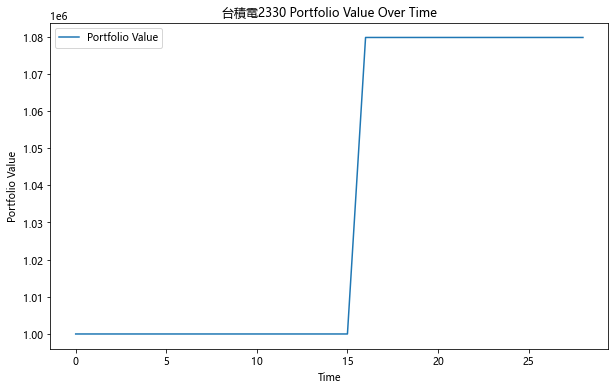

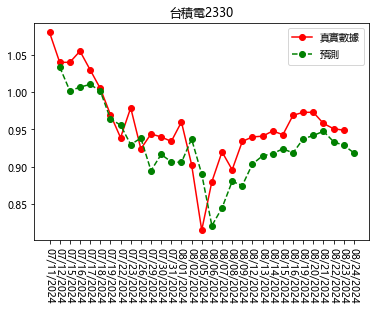

In [33]:
import requests
from twstock import Stock
from typing import Dict, List
import twstock
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import matplotlib.pyplot as plt


plt.rcParams['font.sans-serif'] = ['Microsoft YaHei']  # 使用微软雅黑字体
plt.rcParams['axes.unicode_minus'] = False  # 解决负号显示问题


class StockPredictor:
    def __init__(self, stock_id: str):
        self.vol = int(WebCrawlerStockVolumes(stock_id).get_volumes())
        self.stock_id = stock_id
        self.name = self.get_stock_basic()
        self.data = None
        self.target_list = None
        self.train_samples = None
        self.train_targets = None
        self.predictions = None
        self.positions = []
        self.daily_trades = []

    def get_stock_basic(self) -> str:
        stock_info = twstock.realtime.get(self.stock_id)
        return stock_info['info']['name'] + stock_info['info']['code']

    def create_dataset(self, time_steps=30):
        stock = Stock(self.stock_id)
        self.data = stock.fetch_from(2018, 1)
        ohlcv_list = [(i.open / 1000, i.high / 1000, i.low / 1000, i.close / 1000, i.capacity / (self.vol * 1000)) for i in self.data]
        self.target_list = [i[3] for i in ohlcv_list]
        self.train_samples = ohlcv_list[:-time_steps]
        self.train_targets = self.target_list[1:-time_steps+1]
        return ohlcv_list
        
    def train_model(self):
        ohlcv_list = self.create_dataset()
        neuron = Neuron()  # 你自定义的神经网络类
        loss = neuron.train(self.train_samples, self.train_targets)
        self.predictions = neuron.predict(ohlcv_list[-30:])

    def backtest(self):
        initial_capital = 1000000  # 初始資本
        cash = initial_capital  # 現金
        stock_holding = 0  # 持有股票數量

        for i in range(len(self.predictions) - 1):
            action = "Hold"
            # 如果預測價格高於當天收盤價，則全倉買入
            if self.predictions[i] > self.target_list[-30 + i]:
                if cash > 0:
                    stock_holding += cash / self.target_list[-30 + i]
                    cash = 0
                    action = "Buy"
            # 如果預測價格低於當天收盤價，則賣出所有持倉
            elif stock_holding > 0:
                cash += stock_holding * self.target_list[-30 + i]
                stock_holding = 0
                action = "Sell"
            
            # 記錄每日的持倉和資產價值
            portfolio_value = cash + stock_holding * self.target_list[-30 + i]
            self.positions.append(portfolio_value)
            self.daily_trades.append({
                "Date": self.data[-30 + i].date.strftime("%Y-%m-%d"),
                "Action": action,
                "Stock Holding": stock_holding,
                "Cash": cash,
                "Portfolio Value": portfolio_value
            })

        final_value = cash + stock_holding * self.target_list[-1]
        print(f"初始資本: {initial_capital}")
        print(f"最終資本: {final_value}")
        print(f"收益率: {((final_value - initial_capital) / initial_capital) * 100:.2f}%")
        self.print_trades()

    def print_trades(self):
        print("\n每日交易操作和持倉表現:")
        for trade in self.daily_trades:
            print(trade)

    def plot_results(self):
        plt.figure(figsize=(10, 6))
        plt.plot(self.positions, label="Portfolio Value")
        plt.title(f"{self.name} Portfolio Value Over Time")
        plt.xlabel("Time")
        plt.ylabel("Portfolio Value")
        plt.legend()
        plt.show()

        self.plot_predictions()

    def plot_predictions(self):
        x = [i.date.strftime("%m/%d/%Y") for i in self.data[-30:]]
        if self.data:
            last_date = self.data[-1].date
            next_day = last_date + timedelta(days=1)
            next_day_formatted = next_day.strftime("%m/%d/%Y")    
            x.append(next_day_formatted)

        plt.xticks(rotation=-90) 
        y = self.target_list[-30:]
        y.append(None)
        plt.title(f'{self.name}')
        plt.plot(x, y, 'ro-', label="真實數據")
        self.predictions.insert(0, None)
        plt.plot(x, self.predictions, 'go--', label="預測")
        plt.legend()
        plt.show()

    def run(self):
        self.train_model()
        self.backtest()
        self.plot_results()

predictor = StockPredictor("2330")
predictor.run()
